In [1014]:
import pandas as pd
import os
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import datetime as dt
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine, inspect, func
import matplotlib
#matplotlib.use('nbagg')
from matplotlib import style
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
from matplotlib.dates import MONDAY

from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter


In [1015]:
#Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite")

In [1016]:
#Use SQLAlchemy automap_base() to reflect your tables 
#into classes and save a reference to those classes called Station and Measurement.
Base = automap_base()

In [1017]:
Base.prepare(engine, reflect=True)

In [1018]:
Base.classes.keys()

['clean_hawaii_measurements', 'clean_hawaii_stations']

In [1019]:
Measurement = Base.classes.clean_hawaii_measurements

In [1020]:
Station = Base.classes.clean_hawaii_stations

In [1021]:
#Choose a start date and end date for your trip. ???
#Make sure that your vacation range is approximately 3-15 days total.??

In [1022]:
session = Session(engine)

In [1023]:
inspector = inspect(engine)
inspector.get_table_names()

['clean_hawaii_measurements', 'clean_hawaii_stations']

In [1024]:
#Precipitation Analysis
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.
#Load the query results into a Pandas DataFrame and set the index to the date column.
#Plot the results using the DataFrame plot method.

In [1025]:
today_date=dt.date.today()

In [1026]:
prev_year = dt.date.today() - dt.timedelta(days=365) #12 months of data

In [1027]:
print(prev_year)

2017-03-03


In [1028]:
prcp_data=session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >prev_year, Measurement.date < today_date).order_by(Measurement.date).all()

In [1029]:
prcp_data

[('2017-03-04', 0.0),
 ('2017-03-04', 0.0),
 ('2017-03-04', 0.0),
 ('2017-03-04', 0.0),
 ('2017-03-04', 0.0),
 ('2017-03-05', 0.35),
 ('2017-03-05', 0.1),
 ('2017-03-05', 0.41),
 ('2017-03-05', 0.35),
 ('2017-03-06', 0.0),
 ('2017-03-06', 0.51),
 ('2017-03-06', 0.03),
 ('2017-03-06', 0.0),
 ('2017-03-07', 0.0),
 ('2017-03-07', 0.0),
 ('2017-03-07', 0.0),
 ('2017-03-07', 0.0),
 ('2017-03-07', 0.0),
 ('2017-03-08', 0.0),
 ('2017-03-08', 0.0),
 ('2017-03-08', 0.0),
 ('2017-03-08', 0.0),
 ('2017-03-08', 0.0),
 ('2017-03-09', 0.0),
 ('2017-03-09', 0.8),
 ('2017-03-09', 0.5),
 ('2017-03-09', 0.0),
 ('2017-03-09', 0.65),
 ('2017-03-09', 0.01),
 ('2017-03-10', 0.0),
 ('2017-03-10', 0.13),
 ('2017-03-10', 0.13),
 ('2017-03-10', 0.0),
 ('2017-03-10', 0.0),
 ('2017-03-10', 0.03),
 ('2017-03-10', 0.0),
 ('2017-03-11', 0.0),
 ('2017-03-11', 0.03),
 ('2017-03-11', 0.0),
 ('2017-03-11', 0.01),
 ('2017-03-11', 0.0),
 ('2017-03-12', 0.0),
 ('2017-03-12', 0.0),
 ('2017-03-12', 0.0),
 ('2017-03-12', 0.0)

In [1030]:
# Plot the Results
### BEGIN SOLUTION
df = pd.DataFrame(prcp_data, columns=['Date', 'Precipitation'])
#df.set_index('Date', inplace=True)
df.head()

,Date,Precipitation
0,2017-03-04,0.0
1,2017-03-04,0.0
2,2017-03-04,0.0
3,2017-03-04,0.0
4,2017-03-04,0.0


In [1031]:
df.dtypes
df['Date'] = pd.to_datetime(df['Date'])

In [1032]:
df.dtypes

Date             datetime64[ns]
Precipitation           float64
dtype: object

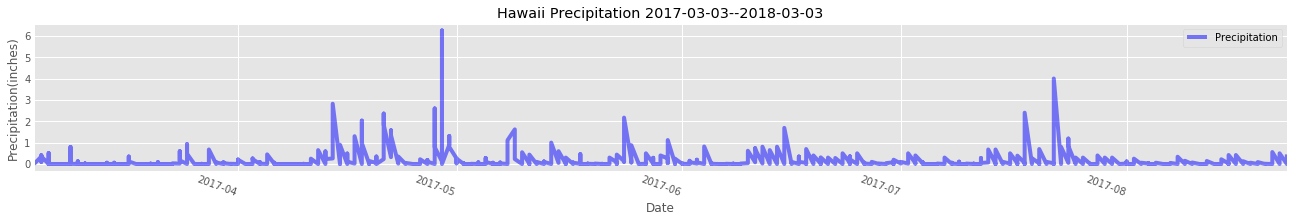

In [1033]:
#Plot the dataframe to a horizontal bar chart
df.plot(x='Date',y='Precipitation', color='b', alpha=0.5, figsize = (20,3), rot = 340)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title(f"Hawaii Precipitation {prev_year}--{today_date}")
plt.legend(["Precipitation"])
plt.savefig("hawaii_prcp.png")
plt.show()

In [1034]:
#Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,Precipitation
count,916.000000
mean,0.151539
std,0.400362
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


In [1035]:
#Design a query to calculate the total number of stations.
total_stations=session.query(func.count(Station.station)).all()
total_stations

[(9)]

In [1036]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
active_stations = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station==Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).\
                                                                                    desc()).all()
active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [1037]:
#Which station has the highest number of observations?
active_stations[0][0]


'USC00519281'

In [1038]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
tobs_12mon_data = session.query(Measurement.station, Station.name, Measurement.tobs).\
filter(Measurement.station==Station.station).filter(Measurement.date > prev_year, Measurement.date < today_date).all()
tobs_12mon_data 

[('USC00519397', 'WAIKIKI 717.2, HI US', 74),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 71),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 69),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 68),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 71),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 72),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 68),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 71),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 74),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 71),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 71),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 71),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 70),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 72),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 69),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 73),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 75),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 75),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 74),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 70),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 73),
 ('USC00519397', 'WAIKIKI 717.2, H

In [1039]:
#Filter by the station with the highest number of observations.
tobs_12mon_data_most_active_station=session.query(Measurement.station, Station.name, Measurement.tobs, Measurement.date).\
filter(Measurement.station==Station.station).filter(Measurement.date > prev_year, Measurement.date < today_date).\
filter(Measurement.station == active_stations[0][0]).all() 
tobs_12mon_data_most_active_station

[('USC00519281', 'WAIHEE 837.5, HI US', 77, '2017-03-04'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 73, '2017-03-05'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 67, '2017-03-06'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 62, '2017-03-07'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 64, '2017-03-08'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 67, '2017-03-09'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 66, '2017-03-10'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 81, '2017-03-11'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 69, '2017-03-12'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 66, '2017-03-13'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 67, '2017-03-14'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 69, '2017-03-15'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 66, '2017-03-16'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 68, '2017-03-17'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 65, '2017-03-18'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 74, '2017-03-19'),
 ('USC00519281', 'WAIHEE 837.5, HI US', 69, '2017-03-20'

In [1040]:
#y=[]
#for x in tobs_12mon_data_most_active_station:
    #y.append(x[2])

In [1041]:
#Plot the results as a histogram with bins=12.
df2 = pd.DataFrame(tobs_12mon_data_most_active_station, columns=['Station', 'Name','TOBS','Date'])
df2.head()
#df2.dtypes

,Station,Name,TOBS,Date
0,USC00519281,"WAIHEE 837.5, HI US",77,2017-03-04
1,USC00519281,"WAIHEE 837.5, HI US",73,2017-03-05
2,USC00519281,"WAIHEE 837.5, HI US",67,2017-03-06
3,USC00519281,"WAIHEE 837.5, HI US",62,2017-03-07
4,USC00519281,"WAIHEE 837.5, HI US",64,2017-03-08


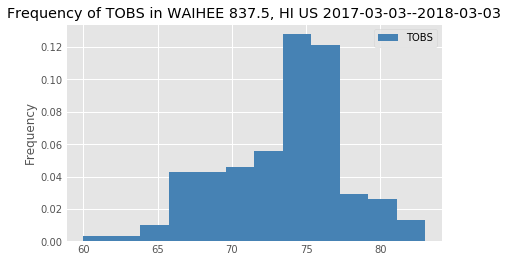

In [1042]:
plt.hist(df2["TOBS"], bins=12
         , normed=True,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.grid(True)
plt.title(f"Frequency of TOBS in {active_stations[0][1]} {prev_year}--{today_date}")
plt.ylabel("Frequency")

plt.legend(["TOBS"])
plt.savefig("tobs.png")
plt.show()

In [1043]:
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-04-05'))

[(58, 69.58076923076923, 75)]


In [1044]:
#Temperature Analysis
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return 
#the minimum, average, and maximum temperatures for that range of dates.
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
def calc_temps(x,y):
    temps= [func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]
    return session.query(*temps).\
filter(func.strftime("%Y-%m-%d", Measurement.date) >=x,func.strftime("%Y-%m-%d", Measurement.date) <= y).all()
    
calc_temps("2017-01-01","2018-01-01")


[(58, 87, 74.02052091554854)]

In [1045]:
temp_avg=temp_analysis[0][2]
temp_min=temp_analysis[0][0]
temp_max=temp_analysis[0][1]
yerr=temp_max-temp_min

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


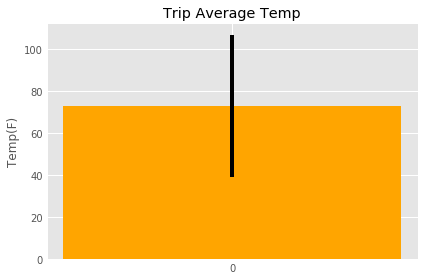

In [1046]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
fig, ax = plt.subplots()
x=1
y=range(x)
#x, height, width, bottom, *, align='center', **kwargs
ax.bar(y,temp_avg, yerr=yerr,align='center',color='orange',width=0.4)
ax.set_title('Trip Average Temp')
plt.ylabel("Temp(F)")
ax.set(xticks=range(x))
fig.tight_layout()
plt.savefig("trip_avg_temp.png")
fig.show()
### END SOLUTION

In [1047]:
start_date=dt.date(2017, 1 ,1)
end_date=dt.date(2017, 1 ,7)

In [1048]:
type(start_date)

datetime.date

In [1049]:
#Calculate the rainfall per weather station using the previous year's matching dates.
prcp_data_per_station= session.query(Measurement.station,Station.name, func.sum(Measurement.prcp)).\
filter(Measurement.station==Station.station).filter(Measurement.date > start_date, Measurement.date < end_date ).\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

prcp_data_per_station



[('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.61),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.6),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.57),
 ('USC00519281', 'WAIHEE 837.5, HI US', 0.16999999999999998),
 ('USC00513117', 'KANEOHE 838.1, HI US', 0.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.0)]

In [1050]:
#Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

normals=[Measurement.station,
         Station.name,
         func.min(Measurement.tobs),
         func.max(Measurement.tobs),
         func.avg(Measurement.tobs)]

daily_normal=session.query(*normals).filter(Measurement.station==Station.station).\
filter(Measurement.date > start_date, Measurement.date < end_date ).\
group_by(Measurement.station).all()
daily_normal

[('USC00513117', 'KANEOHE 838.1, HI US', 64, 70, 66.0),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 70, 74, 71.6),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 65, 71, 69.4),
 ('USC00519281', 'WAIHEE 837.5, HI US', 62, 70, 64.4),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 62, 66, 63.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  71,
  74,
  72.66666666666667)]

In [1051]:
#Create a function called daily_normals that will calculate the daily normals for a specific date. 
#This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.

def daily_normals(date):
    normals=[func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
    return session.query(*normals). filter(func.strftime("%m-%d", Measurement.date) == date).all()
daily_normals("01-01")



[(62, 77, 69.06)]

In [1052]:
#Create a list of dates for your trip in the format %m-%d. 
#Use the daily_normals function to calculate the normals for each date string and append the results to a list.
s_date=dt.date(2018, 1 ,1)
e_date=dt.date(2018, 1,7)
trip_date= pd.date_range(s_date, e_date, freq='D')
trip_date_mon=trip_date.strftime("%m-%d")
trip_date_mon

array(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07'],
      dtype='<U5')

In [1053]:
daily_normals("01-04")

[(58, 76, 69.83636363636364)]

In [1054]:
values=[]
for date in trip_date_mon:
    values.append(*daily_normals(date))
values

[(62, 77, 69.06),
 (60, 77, 69.40816326530613),
 (62, 77, 68.83333333333333),
 (58, 76, 69.83636363636364),
 (56, 76, 68.0),
 (61, 76, 68.88679245283019),
 (57, 76, 68.38181818181818)]

In [1055]:
#Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
df3 = pd.DataFrame(values, columns=['Tmix', 'Tmax','Tavg'])
df3


,Tmix,Tmax,Tavg
0,62,77,69.060000
1,60,77,69.408163
2,62,77,68.833333
3,58,76,69.836364
4,56,76,68.000000
5,61,76,68.886792
6,57,76,68.381818


In [1059]:
df3["Trip_Date"]= trip_date

df3.set_index(['Trip_Date'], inplace=True)
df3

,Tmix,Tmax,Tavg
Trip_Date,,,
2018-01-01,62,77,69.060000
2018-01-02,60,77,69.408163
2018-01-03,62,77,68.833333
2018-01-04,58,76,69.836364
2018-01-05,56,76,68.000000
2018-01-06,61,76,68.886792
2018-01-07,57,76,68.381818


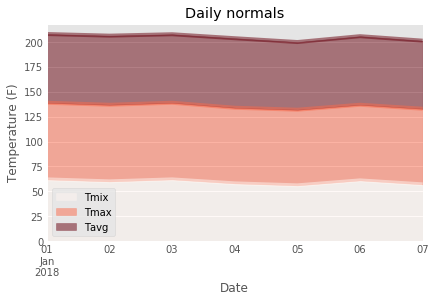

In [1060]:
#Use Pandas to plot an area plot (stacked=False) for the daily normals.
df3.plot(kind='area', stacked='false', alpha=0.5, colormap='Reds',title='Daily normals')
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.savefig("daily_normals.png")